<a id="top" />

# Computer Vision Assignment - 1

By: Mrinal Jain (mj2377)  
Kaggle username: mrinaljain

### Referenced papers

**[1]: [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)**

**[2]: [Bag of Tricks for Image Classification with Convolutional Neural Networks](https://arxiv.org/abs/1812.01187)**

**[3]: [Identity Mappings in Deep Residual Networks](https://arxiv.org/abs/1603.05027)**

**[4]: [Decoupled Weight Decay Regularization](https://arxiv.org/abs/1711.05101)**


## Data Pre-processing

The following 2 pre-processing techniques were explored.

1. Default data processing
    - Resize to (32, 32)
    - Normalize to have mean=0 and std=1
    
2. Data processing with added noise
    - Resize to (32, 32)
    - Add gaussion noise from $\mathcal{N}(0, 0.1)$
    - Normalize to have mean=0 and std=1
    
**`Batch size = 128`**: Initial trials showed that a batch size of 128 was slightly better than other sizes (64, 256).

## Baseline model

**ResNet with 18 layers** (proposed in [\[1\]](https://arxiv.org/abs/1512.03385)) was used as the baseline.

## Training configurations

For consistency, the following procedure was used for training across all model architectures.

- **Loss function:** Cross-entropy
- **Optimizer:** Adam (with default parameters). Because it does not need much manual tuning (like SGD), and works relatively well out-of-the-box.
- **Learning rate:** $0.001$
- **Epochs:** $50$ (maximum)
- **Early stopping:** After 20 epochs, if the validation loss does not decrease (from the overall best loss achieved) for 5 consecutive epochs, then the training was terminated. Note that each model configuration ran for at least 20 epochs.

## Experiments

In essense, this part of the homework explored almost all of the tricks suggested to improve the performance of CNNs in [\[2\]](https://arxiv.org/abs/1812.01187).

The following ResNet tweaks were experimented with, as proposed in [\[2\]](https://arxiv.org/abs/1812.01187).

1. **Original ResNet (18 layers)**
2. **ResNet-C (18 layers)**: In this variant, the 7x7 convolution in the input stem on the original resnet is replaced with 3 consecutive 3x3 convolutions.
3. **ResNet-D (18 layers)**: In this variant, the 1x1 convolution (with stride=2) in each block was replaced with an average pooling layer (with stride=2) followed by a 1x1 convolution (with stride=1). Note that these modifications were made on top of ResNet-C.
4. **Pre-activation ResNet (18 layers)**: Paper [\[3\]](https://arxiv.org/abs/1603.05027) proposed that the batch norm and ReLU should be applied before the convolutional layer in each block (while still keeping the skip connection path clean). Note that these modifications were made on top of ResNet-C.
5. **ResNet-C (50 layers)**: To see what happens if the layers are increased.

### Other tricks

1. **Label smoothing** (proposed in [\[2\]](https://arxiv.org/abs/1812.01187)): At a high-level, this technique alters the distribution of the final softmax layer, and helps generalize the model better and converge to a better optimum.
2. **Mixup training** (proposed in [\[2\]](https://arxiv.org/abs/1812.01187)): This is kind of an augmentation. While training, each image in the batch is super-imposed (with a factor $\lambda \in [0, 1]$) with another randomly selected image from the same batch. Here $\lambda \text{ is drawn from Beta}(0.2, 0.2)$. The loss is computed taking into account the above "mixing". Mixup effectively makes training more difficuly, and could potentially lead to better generalization in models.

## Results

**For consistency and unbiased comparision of these tweaks/techniques, the training procedure (as explained above) was kept the same for all the experiments.**

*(The links will take to the corresponding cell in which the experiment was excuted)*

Adding gaussian noise to the data didn't help in the performance.

| Experiment                                                         | Validation accuracy |
|--------------------------------------------------------------------|---------------------|
| [Data processing with added noise + Original ResNet-18](#config-1) | 77.4%               |
| [Default data processing + Original ResNet-18](#config-2)          | **86.2%**           |


*Therefore, all the experiments later used only the default data processing steps (no noise).*

| Experiment                                                               | Validation accuracy |
|--------------------------------------------------------------------------|---------------------|
| [Original Resnet-18](#config-2)                                          | 86.2%               |
| [ResNet-18 Variant C](#config-3)                                         | 93.4%               |
| [ResNet-18 Variant D](#config-4)                                         | 93.6%               |
| [ResNet-18 Variant C with Pre-activation](#config-5)                     | 91.6%               |
| [ResNet-50 Variant C](#config-6)                                         | 84.5%               |
| [ResNet-18 Variant D with Label smoothing](#config-7)                    | 94.5%               |
| [ResNet-18 Variant D with Mixup training](#config-8)                     | **95.2%**           |
| [ResNet-18 Variant D with Label smoothing and Mixup training](#config-9) | 93.5%               |

Some observations were:

1. ResNet-C and ResNet-D had similar accuracy by the end of training, but ResNet-D seemed to have reached a better minima in the loss landscape, by looking at the train/validation losses in the last 5-7 epochs of training.
2. Pre-activation didn't help in the performance.
3. The 50 layer model clearly seems to have suffered overfitting.
4. Both label smoothing and mixup training improved upon the performance of ResNet-D, but both of these combined didn't perform as well.

**Finally, ResNet-18 Variant D model with Mixup training gave the best results**.

## Final model: **ResNet-18 Variant D with Mixup**

To help models generalize to unseen data better, L-2 regularization is often used. Most implementations provide this functionality via a parameter called `weight_decay` in the optimizer. However, paper [\[4\]](https://arxiv.org/abs/1711.05101) have argued that weight decay and L-2 regularization is not equivalent in case of the existing Adam implementations, and proposed a modified optimized which fixes this issue - called **AdamW**.

**For the final model, AdamW (with default parameters: `weight_decay=0.01`) is used as the optimizer, with the same learning rate of $0.001$.**

| Experiment                                                                                   | Validation accuracy |
|----------------------------------------------------------------------------------------------|---------------------|
| [ResNet-18 Variant D with Mixup training, **Adam Optimizer**](#config-8)                     | 95.2%               |
| [ResNet-18 Variant D with Mixup training, **AdamW Optimized with weight decay**](#config-10) | 95.3%               |

Some observations for the model with **AdamW optimizer**:

1. The model with AdamW optimizer overall ended with a better validation accuracy.
2. **Early stopping didn't kick in till 34 epochs** (vs. 26 epochs for model with Adam optimizer): This suggests that the optimizer potentially reached a better "valley" in the loss landscape, and kept improving.
3. Moreover, the variance in the performance during the last 5-7 epochs is much low in case of AdamW, again suggesting a more stable training.

### This final configuration achieved a **test set accuracy of 97.8%**.

## Visualizations

1. [This plot](#vis-1) shows that the training of ResNet-D was infact more stable than ResNet-C.
2. [This plot](#vis-2) shows the effect of Mixup on the training, and a comparision between Adam and AdamW optimizer. There is a lot of fluctions in the training loss, probably reinforcing that mixup indeed makes training much more complicated.

### [Code Repository](https://github.com/MrinalJain17/traffic-sign-detection-homework)

This notebook only contains the experiments performed and their results.

The supporting code is in this [GitHub Repository](https://github.com/MrinalJain17/traffic-sign-detection-homework).

In particular:

1. [models.py](https://github.com/MrinalJain17/traffic-sign-detection-homework/blob/master/models.py) have all the different model implementations.
2. [main.py](https://github.com/MrinalJain17/traffic-sign-detection-homework/blob/master/main.py) has the training/validation loop.
3. [utils.py](https://github.com/MrinalJain17/traffic-sign-detection-homework/blob/master/utils.py) has the code for techniques like mixup training, label smoothing, etc.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms

from data import data_loaders, AddGaussianNoise
from main import Trainer, make_predictions
from models import resnet18, resnet50
from utils import LabelSmoothingCrossEntropy

SEED = 42

torch.manual_seed(SEED);

results = dict()

<a id="config-1" />

## Model: Original ResNet-18
## Data pre-processing: Normalization, Gaussian Noise

*[Go to top](#top)*

In [2]:
# Data parameters
num_classes = 43
batch_size = 128
data_transforms = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    AddGaussianNoise(),
    transforms.Normalize((0.3337, 0.3064, 0.3171), (0.2672, 0.2564, 0.2629)),
])

train_loader, val_loader = data_loaders(batch_size, data_transforms)

In [3]:
# Training parameters
resnet_variant = None  # Default
epochs = 50
criterion = nn.CrossEntropyLoss()
lr = 0.001

model = resnet18(variant=resnet_variant, num_classes=num_classes)

trainer = Trainer(model, train_loader, val_loader, criterion, lr)
trainer.run(epochs)

results["config_1"] = {
    "description": "Default ResNet, with gaussian noise",
    "train_loss": trainer.train_loss,
    "test_loss": trainer.test_loss,
    "test_accuracy": trainer.test_accuracy
}

Epoch 1 	train_loss: 1.006158	val_loss: 1.5582	val_accuracy: 59.22%
Epoch 2 	train_loss: 0.367290	val_loss: 1.0774	val_accuracy: 72.27%
Epoch 3 	train_loss: 0.248792	val_loss: 0.9658	val_accuracy: 75.63%
Epoch 4 	train_loss: 0.215033	val_loss: 1.0497	val_accuracy: 74.21%
Epoch 5 	train_loss: 0.176475	val_loss: 1.2094	val_accuracy: 73.20%
Epoch 6 	train_loss: 0.160065	val_loss: 1.3530	val_accuracy: 74.86%
Epoch 7 	train_loss: 0.160517	val_loss: 0.9490	val_accuracy: 80.03%
Epoch 8 	train_loss: 0.127927	val_loss: 1.1632	val_accuracy: 76.33%
Epoch 9 	train_loss: 0.119577	val_loss: 1.3491	val_accuracy: 74.29%
Epoch 10 	train_loss: 0.135329	val_loss: 0.9324	val_accuracy: 78.84%
Epoch 11 	train_loss: 0.120783	val_loss: 1.3980	val_accuracy: 77.26%
Epoch 12 	train_loss: 0.105518	val_loss: 1.2252	val_accuracy: 76.56%
Epoch 13 	train_loss: 0.087548	val_loss: 1.1576	val_accuracy: 76.67%
Epoch 14 	train_loss: 0.107305	val_loss: 1.2855	val_accuracy: 77.16%
Epoch 15 	train_loss: 0.089667	val_loss: 1.

<a id="config-2" />

## Model: Original ResNet-18
## Data pre-processing: Only normalization

*[Go to top](#top)*

In [4]:
# Data parameters
num_classes = 43
batch_size = 128
data_transforms = None  # Default

train_loader, val_loader = data_loaders(batch_size, data_transforms)

In [5]:
# Training parameters
resnet_variant = None  # Default
epochs = 50
criterion = nn.CrossEntropyLoss()
lr = 0.001

model = resnet18(variant=resnet_variant, num_classes=num_classes)

trainer = Trainer(model, train_loader, val_loader, criterion, lr)
trainer.run(epochs)

results["config_2"] = {
    "description": "Default ResNet",
    "train_loss": trainer.train_loss,
    "test_loss": trainer.test_loss,
    "test_accuracy": trainer.test_accuracy
}

Epoch 1 	train_loss: 0.676901	val_loss: 1.3454	val_accuracy: 65.89%
Epoch 2 	train_loss: 0.159109	val_loss: 0.9316	val_accuracy: 77.91%
Epoch 3 	train_loss: 0.086737	val_loss: 0.7842	val_accuracy: 82.17%
Epoch 4 	train_loss: 0.061437	val_loss: 1.0626	val_accuracy: 79.12%
Epoch 5 	train_loss: 0.085903	val_loss: 0.8125	val_accuracy: 82.20%
Epoch 6 	train_loss: 0.059304	val_loss: 0.7283	val_accuracy: 84.42%
Epoch 7 	train_loss: 0.027283	val_loss: 0.6223	val_accuracy: 86.30%
Epoch 8 	train_loss: 0.024661	val_loss: 0.9561	val_accuracy: 80.98%
Epoch 9 	train_loss: 0.074207	val_loss: 0.6304	val_accuracy: 86.38%
Epoch 10 	train_loss: 0.022352	val_loss: 0.7869	val_accuracy: 85.43%
Epoch 11 	train_loss: 0.037583	val_loss: 0.5864	val_accuracy: 87.42%
Epoch 12 	train_loss: 0.014358	val_loss: 0.7250	val_accuracy: 87.78%
Epoch 13 	train_loss: 0.015592	val_loss: 0.7599	val_accuracy: 85.56%
Epoch 14 	train_loss: 0.019920	val_loss: 0.8906	val_accuracy: 85.27%
Epoch 15 	train_loss: 0.041864	val_loss: 0.

<a id="config-3" />

## Model: ResNet-18 (Variant C)

*[Go to top](#top)*

In [6]:
# Training parameters
resnet_variant = "C"
epochs = 50
criterion = nn.CrossEntropyLoss()
lr = 0.001

model = resnet18(variant=resnet_variant, num_classes=num_classes)

trainer = Trainer(model, train_loader, val_loader, criterion, lr)
trainer.run(epochs)

results["config_3"] = {
    "description": "ResNet-C",
    "train_loss": trainer.train_loss,
    "test_loss": trainer.test_loss,
    "test_accuracy": trainer.test_accuracy
}

Epoch 1 	train_loss: 0.632779	val_loss: 0.8807	val_accuracy: 77.26%
Epoch 2 	train_loss: 0.085213	val_loss: 0.7935	val_accuracy: 79.25%
Epoch 3 	train_loss: 0.056613	val_loss: 0.4586	val_accuracy: 89.72%
Epoch 4 	train_loss: 0.024932	val_loss: 0.5980	val_accuracy: 88.32%
Epoch 5 	train_loss: 0.042811	val_loss: 0.4356	val_accuracy: 91.01%
Epoch 6 	train_loss: 0.034207	val_loss: 0.6138	val_accuracy: 87.42%
Epoch 7 	train_loss: 0.015185	val_loss: 0.4187	val_accuracy: 91.73%
Epoch 8 	train_loss: 0.017719	val_loss: 0.5004	val_accuracy: 89.30%
Epoch 9 	train_loss: 0.028652	val_loss: 0.4471	val_accuracy: 89.10%
Epoch 10 	train_loss: 0.016498	val_loss: 0.3699	val_accuracy: 91.86%
Epoch 11 	train_loss: 0.011051	val_loss: 0.6527	val_accuracy: 89.17%
Epoch 12 	train_loss: 0.012692	val_loss: 0.4357	val_accuracy: 90.93%
Epoch 13 	train_loss: 0.011708	val_loss: 0.3967	val_accuracy: 92.40%
Epoch 14 	train_loss: 0.029861	val_loss: 0.3897	val_accuracy: 91.71%
Epoch 15 	train_loss: 0.019174	val_loss: 0.

<a id="config-4" />

## Model: ResNet-18 (Variant D)

*[Go to top](#top)*

In [7]:
# Training parameters
resnet_variant = "D"
epochs = 50
criterion = nn.CrossEntropyLoss()
lr = 0.001

model = resnet18(variant=resnet_variant, num_classes=num_classes)

trainer = Trainer(model, train_loader, val_loader, criterion, lr)
trainer.run(epochs)

results["config_4"] = {
    "description": "ResNet-D",
    "train_loss": trainer.train_loss,
    "test_loss": trainer.test_loss,
    "test_accuracy": trainer.test_accuracy
}

Epoch 1 	train_loss: 0.707616	val_loss: 0.6147	val_accuracy: 83.00%
Epoch 2 	train_loss: 0.069794	val_loss: 0.6265	val_accuracy: 84.19%
Epoch 3 	train_loss: 0.057486	val_loss: 0.4783	val_accuracy: 88.45%
Epoch 4 	train_loss: 0.033010	val_loss: 0.3416	val_accuracy: 90.98%
Epoch 5 	train_loss: 0.017468	val_loss: 0.2842	val_accuracy: 92.07%
Epoch 6 	train_loss: 0.024117	val_loss: 0.5813	val_accuracy: 86.51%
Epoch 7 	train_loss: 0.043403	val_loss: 0.3853	val_accuracy: 91.37%
Epoch 8 	train_loss: 0.029231	val_loss: 0.4512	val_accuracy: 89.35%
Epoch 9 	train_loss: 0.010300	val_loss: 0.2860	val_accuracy: 93.82%
Epoch 10 	train_loss: 0.025510	val_loss: 0.3721	val_accuracy: 90.41%
Epoch 11 	train_loss: 0.006692	val_loss: 0.3311	val_accuracy: 93.02%
Epoch 12 	train_loss: 0.008176	val_loss: 0.3968	val_accuracy: 91.34%
Epoch 13 	train_loss: 0.022560	val_loss: 0.3935	val_accuracy: 91.99%
Epoch 14 	train_loss: 0.007611	val_loss: 0.3456	val_accuracy: 92.22%
Epoch 15 	train_loss: 0.011935	val_loss: 0.

<a id="config-5" />

## Model: ResNet-18 (Variant C with Pre-activation)

*[Go to top](#top)*

In [8]:
# Training parameters
resnet_variant = "PA"
epochs = 50
criterion = nn.CrossEntropyLoss()
lr = 0.001

model = resnet18(variant=resnet_variant, num_classes=num_classes)

trainer = Trainer(model, train_loader, val_loader, criterion, lr)
trainer.run(epochs)

results["config_5"] = {
    "description": "Pre-activation ResNet-C",
    "train_loss": trainer.train_loss,
    "test_loss": trainer.test_loss,
    "test_accuracy": trainer.test_accuracy
}

Epoch 1 	train_loss: 0.789000	val_loss: 1.0367	val_accuracy: 70.90%
Epoch 2 	train_loss: 0.102170	val_loss: 0.7419	val_accuracy: 81.73%
Epoch 3 	train_loss: 0.045242	val_loss: 0.6189	val_accuracy: 83.10%
Epoch 4 	train_loss: 0.045705	val_loss: 0.5621	val_accuracy: 85.79%
Epoch 5 	train_loss: 0.035563	val_loss: 0.4853	val_accuracy: 87.75%
Epoch 6 	train_loss: 0.017457	val_loss: 0.4835	val_accuracy: 88.73%
Epoch 7 	train_loss: 0.025087	val_loss: 0.4710	val_accuracy: 89.02%
Epoch 8 	train_loss: 0.020680	val_loss: 0.5064	val_accuracy: 90.16%
Epoch 9 	train_loss: 0.020263	val_loss: 0.5041	val_accuracy: 89.17%
Epoch 10 	train_loss: 0.013219	val_loss: 0.7237	val_accuracy: 85.25%
Epoch 11 	train_loss: 0.015571	val_loss: 0.6644	val_accuracy: 84.94%
Epoch 12 	train_loss: 0.023233	val_loss: 0.4167	val_accuracy: 91.01%
Epoch 13 	train_loss: 0.004745	val_loss: 0.4101	val_accuracy: 91.65%
Epoch 14 	train_loss: 0.014175	val_loss: 0.3949	val_accuracy: 90.34%
Epoch 15 	train_loss: 0.012330	val_loss: 0.

<a id="config-6" />

## Model: ResNet-50 (Variant C)

*[Go to top](#top)*

In [9]:
# Training parameters
resnet_variant = "C"
epochs = 50
criterion = nn.CrossEntropyLoss()
lr = 0.001

model = resnet50(variant=resnet_variant, num_classes=num_classes)

trainer = Trainer(model, train_loader, val_loader, criterion, lr)
trainer.run(epochs)

results["config_6"] = {
    "description": "ResNet-C 50 layers",
    "train_loss": trainer.train_loss,
    "test_loss": trainer.test_loss,
    "test_accuracy": trainer.test_accuracy
}

Epoch 1 	train_loss: 1.794865	val_loss: 2.8826	val_accuracy: 33.28%
Epoch 2 	train_loss: 0.339485	val_loss: 1.4417	val_accuracy: 64.63%
Epoch 3 	train_loss: 0.112093	val_loss: 1.3446	val_accuracy: 70.57%
Epoch 4 	train_loss: 0.078326	val_loss: 1.2400	val_accuracy: 74.06%
Epoch 5 	train_loss: 0.066396	val_loss: 1.1811	val_accuracy: 76.38%
Epoch 6 	train_loss: 0.056080	val_loss: 1.0764	val_accuracy: 77.83%
Epoch 7 	train_loss: 0.043100	val_loss: 0.9902	val_accuracy: 78.71%
Epoch 8 	train_loss: 0.017561	val_loss: 0.8202	val_accuracy: 84.13%
Epoch 9 	train_loss: 0.036913	val_loss: 0.6999	val_accuracy: 83.93%
Epoch 10 	train_loss: 0.036301	val_loss: 0.8063	val_accuracy: 82.61%
Epoch 11 	train_loss: 0.037554	val_loss: 0.8504	val_accuracy: 82.66%
Epoch 12 	train_loss: 0.053934	val_loss: 0.6966	val_accuracy: 84.88%
Epoch 13 	train_loss: 0.025245	val_loss: 0.4883	val_accuracy: 88.40%
Epoch 14 	train_loss: 0.052310	val_loss: 0.6950	val_accuracy: 86.56%
Epoch 15 	train_loss: 0.017810	val_loss: 0.

<a id="config-7" />

## Model: ResNet-18 (Variant D) with Label Smoothing

*[Go to top](#top)*

In [13]:
# Training parameters
resnet_variant = "D"
epochs = 50
criterion = LabelSmoothingCrossEntropy()
lr = 0.001

model = resnet18(variant=resnet_variant, num_classes=num_classes)

trainer = Trainer(model, train_loader, val_loader, criterion, lr)
trainer.run(epochs)

results["config_7"] = {
    "description": "ResNet-D, label smoothing",
    "train_loss": trainer.train_loss,
    "test_loss": trainer.test_loss,
    "test_accuracy": trainer.test_accuracy
}

Epoch 1 	train_loss: 1.323418	val_loss: 1.1983	val_accuracy: 84.19%
Epoch 2 	train_loss: 0.747717	val_loss: 1.0580	val_accuracy: 87.98%
Epoch 3 	train_loss: 0.719342	val_loss: 0.9865	val_accuracy: 90.36%
Epoch 4 	train_loss: 0.704782	val_loss: 1.0801	val_accuracy: 87.55%
Epoch 5 	train_loss: 0.725544	val_loss: 0.9034	val_accuracy: 93.28%
Epoch 6 	train_loss: 0.694169	val_loss: 0.9425	val_accuracy: 91.83%
Epoch 7 	train_loss: 0.702366	val_loss: 0.9604	val_accuracy: 91.58%
Epoch 8 	train_loss: 0.705989	val_loss: 0.9709	val_accuracy: 91.03%
Epoch 9 	train_loss: 0.704480	val_loss: 0.9376	val_accuracy: 92.45%
Epoch 10 	train_loss: 0.692320	val_loss: 0.8912	val_accuracy: 93.80%
Epoch 11 	train_loss: 0.691239	val_loss: 0.9394	val_accuracy: 92.69%
Epoch 12 	train_loss: 0.709535	val_loss: 0.9480	val_accuracy: 92.20%
Epoch 13 	train_loss: 0.696563	val_loss: 0.8808	val_accuracy: 94.32%
Epoch 14 	train_loss: 0.698514	val_loss: 0.9074	val_accuracy: 92.84%
Epoch 15 	train_loss: 0.692594	val_loss: 0.

<a id="config-8" />

## Model: ResNet-18 (Variant D) with Mixup training

*[Go to top](#top)*

In [14]:
# Training parameters
resnet_variant = "D"
epochs = 50
criterion = nn.CrossEntropyLoss()
lr = 0.001

model = resnet18(variant=resnet_variant, num_classes=num_classes)

trainer = Trainer(model, train_loader, val_loader, criterion, lr)
trainer.run(epochs, mixup=True)

results["config_8"] = {
    "description": "ResNet-D, mixup training",
    "train_loss": trainer.train_loss,
    "test_loss": trainer.test_loss,
    "test_accuracy": trainer.test_accuracy
}

Epoch 1 	train_loss: 1.346179	val_loss: 0.8396	val_accuracy: 77.05%
Epoch 2 	train_loss: 0.682873	val_loss: 0.6047	val_accuracy: 86.87%
Epoch 3 	train_loss: 0.643334	val_loss: 0.5352	val_accuracy: 87.70%
Epoch 4 	train_loss: 0.562221	val_loss: 0.6161	val_accuracy: 85.14%
Epoch 5 	train_loss: 0.631765	val_loss: 0.4241	val_accuracy: 91.19%
Epoch 6 	train_loss: 0.559276	val_loss: 0.3538	val_accuracy: 91.29%
Epoch 7 	train_loss: 0.519888	val_loss: 0.2838	val_accuracy: 93.18%
Epoch 8 	train_loss: 0.537027	val_loss: 0.3033	val_accuracy: 92.09%
Epoch 9 	train_loss: 0.558925	val_loss: 0.3466	val_accuracy: 92.53%
Epoch 10 	train_loss: 0.462724	val_loss: 0.3042	val_accuracy: 92.40%
Epoch 11 	train_loss: 0.548178	val_loss: 0.3319	val_accuracy: 92.76%
Epoch 12 	train_loss: 0.432708	val_loss: 0.2629	val_accuracy: 94.06%
Epoch 13 	train_loss: 0.476969	val_loss: 0.3156	val_accuracy: 93.33%
Epoch 14 	train_loss: 0.466316	val_loss: 0.2353	val_accuracy: 94.81%
Epoch 15 	train_loss: 0.491364	val_loss: 0.

<a id="config-9" />

## Model: ResNet-18 (Variant D) with Mixup training and Label smoothing

*[Go to top](#top)*

In [15]:
# Training parameters
resnet_variant = "D"
epochs = 50
criterion = LabelSmoothingCrossEntropy()
lr = 0.001

model = resnet18(variant=resnet_variant, num_classes=num_classes)

trainer = Trainer(model, train_loader, val_loader, criterion, lr)
trainer.run(epochs, mixup=True)

results["config_9"] = {
    "description": "ResNet-D, label smoothing and mixup training",
    "train_loss": trainer.train_loss,
    "test_loss": trainer.test_loss,
    "test_accuracy": trainer.test_accuracy
}

Epoch 1 	train_loss: 1.830268	val_loss: 1.4087	val_accuracy: 77.86%
Epoch 2 	train_loss: 1.226454	val_loss: 1.3195	val_accuracy: 83.90%
Epoch 3 	train_loss: 1.233289	val_loss: 1.1242	val_accuracy: 88.53%
Epoch 4 	train_loss: 1.164373	val_loss: 1.0814	val_accuracy: 91.86%
Epoch 5 	train_loss: 1.098145	val_loss: 1.0487	val_accuracy: 89.74%
Epoch 6 	train_loss: 1.129215	val_loss: 1.0309	val_accuracy: 89.22%
Epoch 7 	train_loss: 1.108693	val_loss: 0.9815	val_accuracy: 92.20%
Epoch 8 	train_loss: 1.102062	val_loss: 0.9654	val_accuracy: 91.50%
Epoch 9 	train_loss: 1.137419	val_loss: 0.9417	val_accuracy: 93.00%
Epoch 10 	train_loss: 1.132443	val_loss: 0.9736	val_accuracy: 91.73%
Epoch 11 	train_loss: 1.064913	val_loss: 0.9605	val_accuracy: 92.71%
Epoch 12 	train_loss: 1.078390	val_loss: 0.9800	val_accuracy: 91.34%
Epoch 13 	train_loss: 1.053110	val_loss: 0.9289	val_accuracy: 93.59%
Epoch 14 	train_loss: 1.086861	val_loss: 0.9298	val_accuracy: 92.97%
Epoch 15 	train_loss: 1.045390	val_loss: 0.

<a id="config-10" />

## Model: ResNet-18 (Variant D) with Mixup training
## Optimizer: AdamW

*[Go to top](#top)*

In [17]:
# Training parameters
resnet_variant = "D"
epochs = 50
criterion = nn.CrossEntropyLoss()
lr = 0.001

model = resnet18(variant=resnet_variant, num_classes=num_classes)

trainer = Trainer(model, train_loader, val_loader, criterion, lr)
trainer.optimizer = optim.AdamW(trainer.model.parameters(), lr)
trainer.run(epochs, mixup=True)

results["config_10"] = {
    "description": "ResNet-D, mixup training, AdamW Optimizer",
    "train_loss": trainer.train_loss,
    "test_loss": trainer.test_loss,
    "test_accuracy": trainer.test_accuracy
}

Epoch 1 	train_loss: 1.354389	val_loss: 0.9104	val_accuracy: 75.37%
Epoch 2 	train_loss: 0.806106	val_loss: 0.6911	val_accuracy: 83.39%
Epoch 3 	train_loss: 0.608038	val_loss: 0.5826	val_accuracy: 86.30%
Epoch 4 	train_loss: 0.620500	val_loss: 0.6255	val_accuracy: 86.49%
Epoch 5 	train_loss: 0.577318	val_loss: 0.5223	val_accuracy: 88.71%
Epoch 6 	train_loss: 0.599600	val_loss: 0.3705	val_accuracy: 92.56%
Epoch 7 	train_loss: 0.549787	val_loss: 0.4151	val_accuracy: 90.80%
Epoch 8 	train_loss: 0.540722	val_loss: 0.4548	val_accuracy: 89.59%
Epoch 9 	train_loss: 0.446334	val_loss: 0.3429	val_accuracy: 92.48%
Epoch 10 	train_loss: 0.467159	val_loss: 0.4018	val_accuracy: 90.03%
Epoch 11 	train_loss: 0.463873	val_loss: 0.3845	val_accuracy: 90.72%
Epoch 12 	train_loss: 0.450973	val_loss: 0.3374	val_accuracy: 91.09%
Epoch 13 	train_loss: 0.529003	val_loss: 0.3662	val_accuracy: 91.68%
Epoch 14 	train_loss: 0.522717	val_loss: 0.3757	val_accuracy: 93.20%
Epoch 15 	train_loss: 0.463445	val_loss: 0.

In [20]:
make_predictions(trainer.model, trainer.device)

100%|██████████| 12630/12630 [00:47<00:00, 268.71it/s]


Written to csv file gtsrb_kaggle.csv


In [22]:
import pickle

def save_results(obj):
    with open("results.pkl", "wb") as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_results():
    with open("results.pkl", "rb") as f:
        return pickle.load(f)
    
save_results(results)

<a id="vis-1" />

## Visualization ResNet-C vs. ResNet-D

*[Go to top](#top)*

ResNet-C vs. ResNet-D with default training configurations


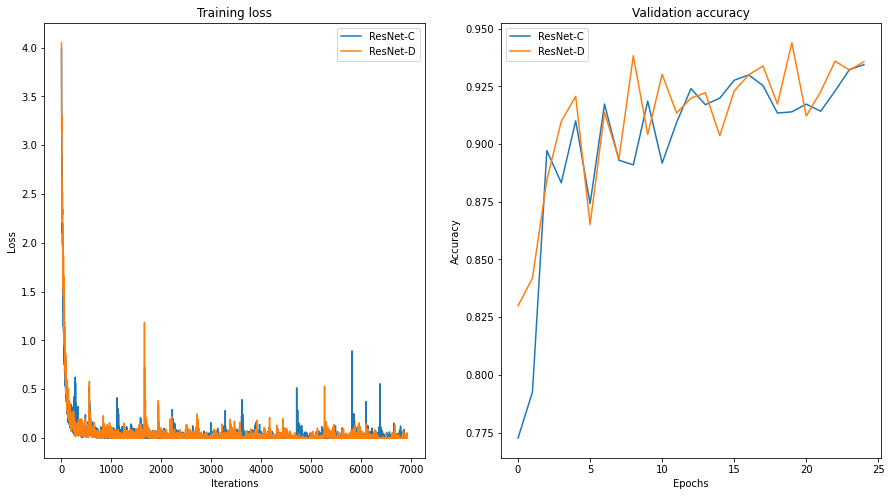

In [37]:
print("ResNet-C vs. ResNet-D with default training configurations")
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.plot(results["config_3"]["train_loss"], label="ResNet-C")
plt.plot(results["config_4"]["train_loss"], label="ResNet-D")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title("Training loss")

plt.subplot(1, 2, 2)
plt.plot(results["config_3"]["test_accuracy"], label="ResNet-C")
plt.plot(results["config_4"]["test_accuracy"], label="ResNet-D")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation accuracy")

plt.show()

<a id="vis-2" />

## Visualization Adam vs. AdamW

*[Go to top](#top)*

Effect of Adam vs. AdamW optimizer, on ResNet-D model with Mixup training


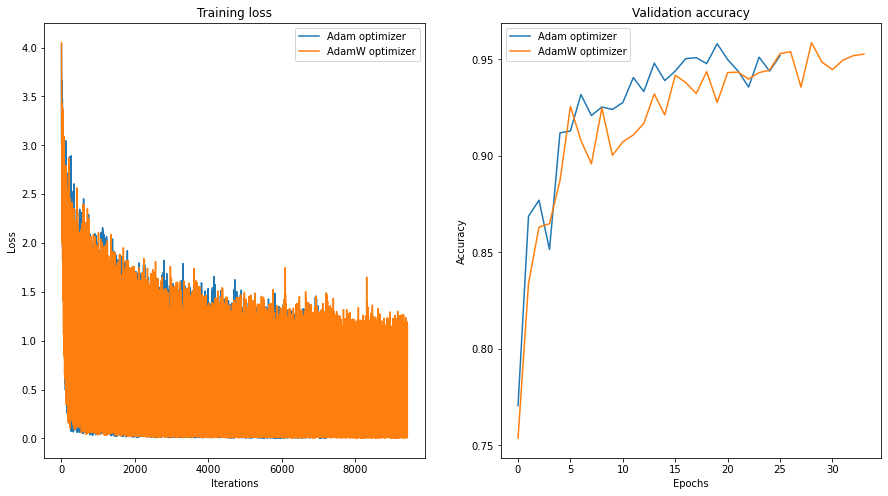

In [38]:
print("Effect of Adam vs. AdamW optimizer, on ResNet-D model with Mixup training")
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.plot(results["config_8"]["train_loss"], label="Adam optimizer")
plt.plot(results["config_10"]["train_loss"], label="AdamW optimizer")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title("Training loss")

plt.subplot(1, 2, 2)
plt.plot(results["config_8"]["test_accuracy"], label="Adam optimizer")
plt.plot(results["config_10"]["test_accuracy"], label="AdamW optimizer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation accuracy")

plt.show()